# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

## **Algoritma Apriori**

Algoritma Apriori adalah suatu algoritma dasar yang diusulkan oleh Agrawal & Srikant pada tahun 1994 untuk penentuan frequent itemsets untuk aturan asosiasi boolean. Algoritma Apriori memberi kita sifat asosiatif dalam transaksi. Ini juga dikenal sebagai Aturan Asosiasi. Aturan asosiasi atau association rule adalah teknik untuk menemukan aturan asosiasi antara suatu kombinasi item. Terdapat 3 metrik untuk mengukur ketepatan aturan, yaitu :


### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

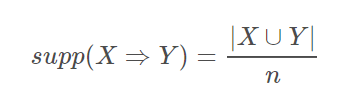

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

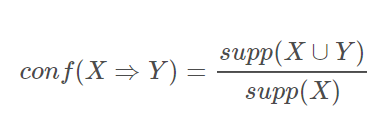

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
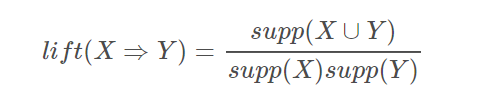



---



# **Bakery Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data BreadBasket_DMS.csv yang bisa temen-temen download [disini](https://github.com/viktree/curly-octo-chainsaw/blob/ea4fbb632382c44af0d0b53c90f4e04496926b94/BreadBasket_DMS.csv)

Sekarang import data ke DataFrame dengan library pandas.

In [2]:
! wget https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/ea4fbb632382c44af0d0b53c90f4e04496926b94/BreadBasket_DMS.csv

--2024-08-28 15:42:02--  https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/ea4fbb632382c44af0d0b53c90f4e04496926b94/BreadBasket_DMS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 710518 (694K) [text/plain]
Saving to: ‘BreadBasket_DMS.csv’

BreadBasket_DMS.csv 100%[===================>] 693.87K  1.11MB/s    in 0.6s    

2024-08-28 15:42:03 (1.11 MB/s) - ‘BreadBasket_DMS.csv’ saved [710518/710518]



Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 21293 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong

In [3]:
# cek tipe data dari setiap kolom

df = pd.read_csv('BreadBasket_DMS.csv')

In [4]:
# mencetak 10 data pertama
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [5]:
#Mencetak jumlah data item yang unik (memiliki nilai item berbeda)

jumlah_item_unik = df['Item'].nunique()

# Mencetak jumlah data item yang unik
print("Jumlah data item yang unik:", jumlah_item_unik)

Jumlah data item yang unik: 95


In [6]:
#Mencetak data item yang unik (memiliki nilai item berbeda)

# Mengambil data item yang unik
item_unik = df['Item'].unique()

# Mencetak data item yang unik
print("Data item yang unik:")
i = 0
while True:
    item = item_unik[i]
    print(item)
    i += 1
    if i >= len(item_unik):
        break

Data item yang unik:
Bread
Scandinavian
Hot chocolate
Jam
Cookies
Muffin
Coffee
Pastry
Medialuna
Tea
NONE
Tartine
Basket
Mineral water
Farm House
Fudge
Juice
Ella's Kitchen Pouches
Victorian Sponge
Frittata
Hearty & Seasonal
Soup
Pick and Mix Bowls
Smoothies
Cake
Mighty Protein
Chicken sand
Coke
My-5 Fruit Shoot
Focaccia
Sandwich
Alfajores
Eggs
Brownie
Dulce de Leche
Honey
The BART
Granola
Fairy Doors
Empanadas
Keeping It Local
Art Tray
Bowl Nic Pitt
Bread Pudding
Adjustment
Truffles
Chimichurri Oil
Bacon
Spread
Kids biscuit
Siblings
Caramel bites
Jammie Dodgers
Tiffin
Olum & polenta
Polenta
The Nomad
Hack the stack
Bakewell
Lemon and coconut
Toast
Scone
Crepes
Vegan mincepie
Bare Popcorn
Muesli
Crisps
Pintxos
Gingerbread syrup
Panatone
Brioche and salami
Afternoon with the baker
Salad
Chicken Stew
Spanish Brunch
Raspberry shortbread sandwich
Extra Salami or Feta
Duck egg
Baguette
Valentine's card
Tshirt
Vegan Feast
Postcard
Nomad bag
Chocolates
Coffee granules 
Drinking chocolate spoo

In [7]:
# Cek missing value dan zeros

missing_values = df.isna().sum()
zeros = (df == 0).sum()

# Menampilkan hasil
print("Jumlah missing value:")
print(missing_values)

print("\nJumlah nilai nol:")
print(zeros)

Jumlah missing value:
Date           0
Time           0
Transaction    0
Item           0
dtype: int64

Jumlah nilai nol:
Date           0
Time           0
Transaction    0
Item           0
dtype: int64


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [8]:
# cek nilai "NONE" pada kolom Item

nilai_none = df['Item'].value_counts().loc['NONE']

print("Nilai 'NONE' pada kolom 'Item':", nilai_none)

Nilai 'NONE' pada kolom 'Item': 786


Terdapat nilai 'NONE' di dataset kita. Ini bisa berarti bahwa ada item yang tidak dibeli, atau nama item tersebut tidak dicatat. Terdapat 786 data dengan nilai "None" dari total 21293. Karena data ini tidak berguna, maka bisa kita hapus saja.

In [9]:
# menghapus baris dengan nilai Item = None

df.drop(df[df['Item'] == 'NONE'].index, inplace=True)

In [10]:
# cek perubahan yang terjadi

filtered_df = df.loc[(df['Date'] == "NONE") | (df['Time'] == "NONE") | (df['Transaction'] == "NONE") | (df['Item'] == "NONE")]

print(df)

             Date      Time  Transaction           Item
0      2016-10-30  09:58:11            1          Bread
1      2016-10-30  10:05:34            2   Scandinavian
2      2016-10-30  10:05:34            2   Scandinavian
3      2016-10-30  10:07:57            3  Hot chocolate
4      2016-10-30  10:07:57            3            Jam
...           ...       ...          ...            ...
21288  2017-04-09  14:32:58         9682         Coffee
21289  2017-04-09  14:32:58         9682            Tea
21290  2017-04-09  14:57:06         9683         Coffee
21291  2017-04-09  14:57:06         9683         Pastry
21292  2017-04-09  15:04:24         9684      Smoothies

[20507 rows x 4 columns]


Seperti yang bisa kita lihat di atas, fitur Tanggal dan Waktu bukanlah tipe numerik. Untuk visualisasi dan pemahaman data yang lebih baik, kita bisa menambahkan beberapa fitur lagi ke DataFrame ini berdasarkan informasi dari dua fitur ini.

In [ ]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

print(df)

             Date      Time  Transaction           Item  Year Month Day
0      2016-10-30  09:58:11            1          Bread  2016    10  30
1      2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2      2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3      2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4      2016-10-30  10:07:57            3            Jam  2016    10  30
...           ...       ...          ...            ...   ...   ...  ..
21288  2017-04-09  14:32:58         9682         Coffee  2017    04  09
21289  2017-04-09  14:32:58         9682            Tea  2017    04  09
21290  2017-04-09  14:57:06         9683         Coffee  2017    04  09
21291  2017-04-09  14:57:06         9683         Pastry  2017    04  09
21292  2017-04-09  15:04:24         9684      Smoothies  2017    04  09

[20507 rows x 7 columns]


In [ ]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 30/10/2016 hingga 09/04/2017. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64


In [ ]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


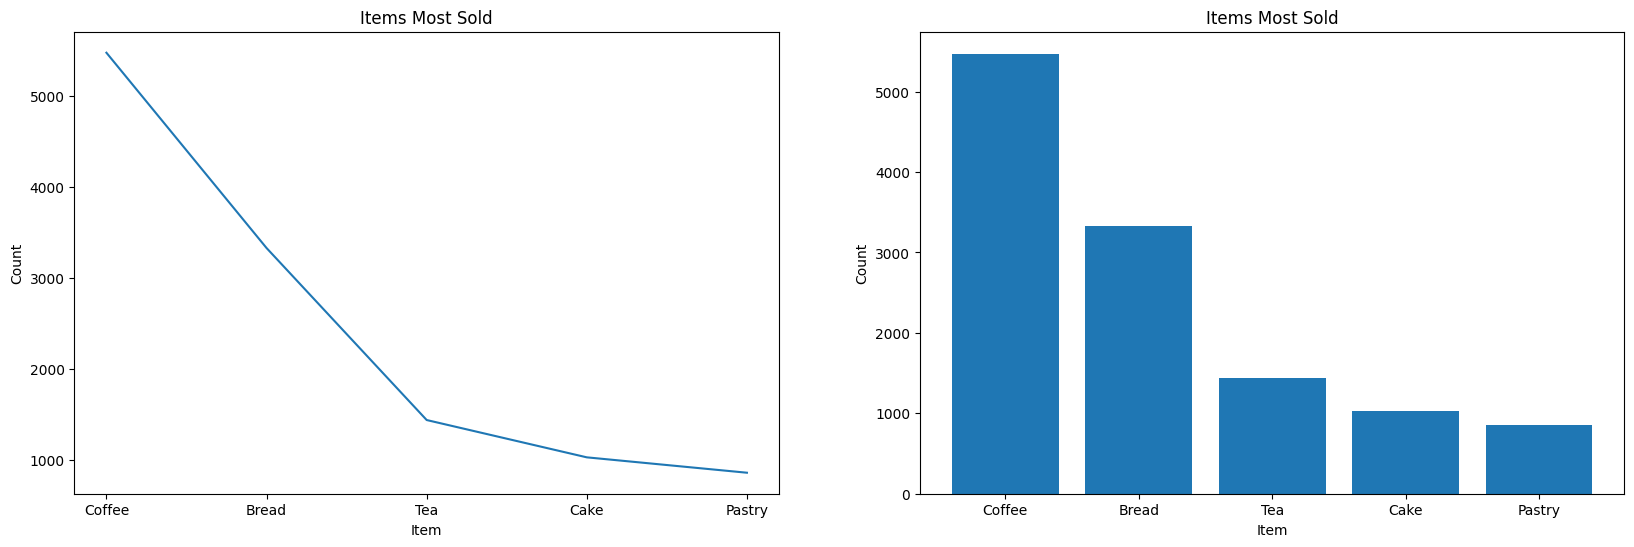

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.plot(transaction_count.head())
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
plt.bar(transaction_count.head().index, transaction_count.head()['Transaction'])
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('Items Most Sold')

plt.show()

Berdasarkan hasil visualisasi, sebutkan 3 barang yang paling banyak terjual !
=>


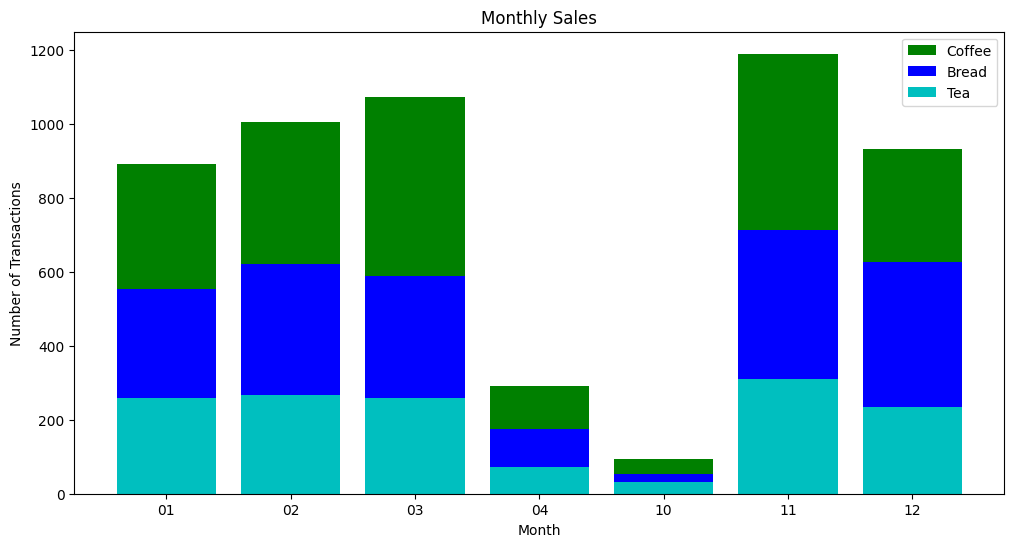

In [ ]:
#buat visualisasi data diagram batang dengan judul 'Monthly Sales' dengan sumbu x bulan dan sumbu y jumlah transaksi

# Menghitung jumlah transaksi berdasarkan bulan dan item
monthly_sales = df.groupby(['Month', 'Item']).size().unstack(fill_value=0)

# Mengambil 3 barang dengan jumlah transaksi terbanyak
top_items = monthly_sales.sum().nlargest(3).index

# Membuat plot
plt.figure(figsize=(12, 6))
colors = ['g', 'b', 'c']  # Warna untuk setiap barang

for i, item in enumerate(top_items):
    plt.bar(monthly_sales.index, monthly_sales[item], label=item, color=colors[i])

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend()

plt.show()

Dari hasil visualisasi data penjualan perbulan, terlihat terjadi perbedaan penjualan yang drastis pada bulan 4 dan 10. Ini disebut dengan outlier.
Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini dibandingkan dengan yang lain.

In [ ]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


Pada Bulan 4 hanya tercatat 9 hari dan pada bulan  10 hanya tercatat 2 hari

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
40,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
39,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
8,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
9,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781
10,(Cake),(Tea),0.023772,0.228891,1.604781
30,(Coffee),(Toast),0.023666,0.049470,1.472431
31,(Toast),(Coffee),0.023666,0.704403,1.472431
37,(Pastry),"(Coffee, Bread)",0.011199,0.130061,1.444872
36,"(Coffee, Bread)",(Pastry),0.011199,0.124413,1.444872


# **Kesimpulan**

Jelaskan makna tabel di atas berdasar nilai-nilai metrik (support, confidence, dan lift)!

Support mengukur seberapa sering itemset atau kombinasi item muncul dalam dataset dengan frekuensi relatif yang dinyatakan dalam nilai support. Confidence digunakan untuk mengukur tingkat ketaatan suatu aturan asosiasi berdasarkan data yang ada. Nilai confidence mencerminkan sejauh mana aturan asosiasi dipatuhi dan diukur dalam persentase. Lift, di sisi lain, mengevaluasi keterkaitan antara item dalam aturan asosiasi dibandingkan dengan kejadian acak. Nilai lift menunjukkan kekuatan keterkaitan tersebut, dengan nilai di atas 1 menunjukkan keterkaitan yang lebih besar dari kejadian acak. Dalam analisis asosiasi, support, confidence, dan lift digunakan untuk mengevaluasi kekuatan dan relevansi aturan asosiasi dalam dataset yang dianalisis, membantu dalam mengidentifikasi aturan yang paling menarik atau signifikan.